In [ ]:
pip install scikit-fuzzy


In [ ]:
pip install paho-mqtt

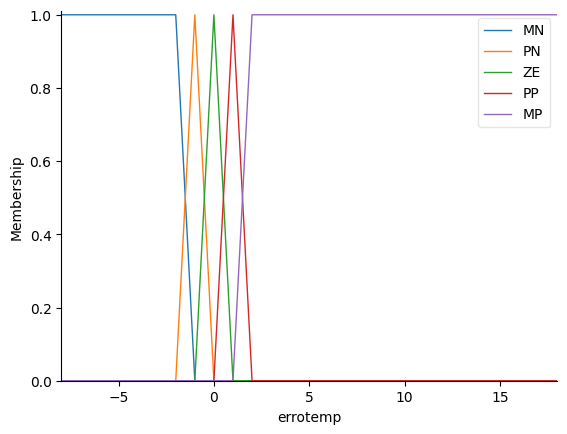

In [ ]:
import numpy as np
import skfuzzy as fuzz
import paho.mqtt.client as mqtt
from skfuzzy import control as ctrl
import time

# mqttBroker ="test.mosquitto.org"
# client = mqtt.Client("c213Inatelsbm")
# client.connect(mqttBroker)

# errotemp - funções de pertinência e universo
errotemp = ctrl.Antecedent(np.arange(-8, 19, 1), 'errotemp')
errotemp['MN'] = fuzz.trapmf(errotemp.universe, [-8, -8, -2, -1])
errotemp['PN'] = fuzz.trimf(errotemp.universe, [-2, -1, 0])
errotemp['ZE'] = fuzz.trimf(errotemp.universe, [-1, 0, 1])
errotemp['PP'] = fuzz.trimf(errotemp.universe, [0, 1, 2])
errotemp['MP'] = fuzz.trapmf(errotemp.universe, [1, 2, 18, 18])
errotemp.view()

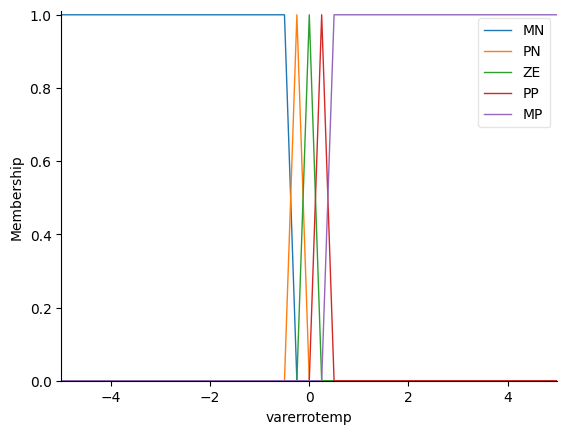

In [ ]:
# varrotemp - funções de pertinência e universo
# varerrotemp =ctrl.Antecedent(np.arange(-2, 2.01, 0.01), 'varerrotemp')
# varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-2, -2, -0.2,-0.1])
# varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.2,-0.1,0])
# varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.1, 0, 0.1])
# varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.1, 0.2])
# varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.1, 0.2, 2,2])
# varerrotemp.view()

varerrotemp =ctrl.Antecedent(np.arange(-5, 5.01, 0.01), 'varerrotemp')
varerrotemp['MN'] = fuzz.trapmf(varerrotemp.universe, [-5, -5, -0.5,-0.25])
varerrotemp['PN'] = fuzz.trimf(varerrotemp.universe, [-0.5,-0.25,0])
varerrotemp['ZE'] = fuzz.trimf(varerrotemp.universe, [-0.25, 0, 0.25])
varerrotemp['PP'] = fuzz.trimf(varerrotemp.universe, [0, 0.25, 0.5])
varerrotemp['MP'] = fuzz.trapmf(varerrotemp.universe,[0.25, 0.5, 5,5])
varerrotemp.view()

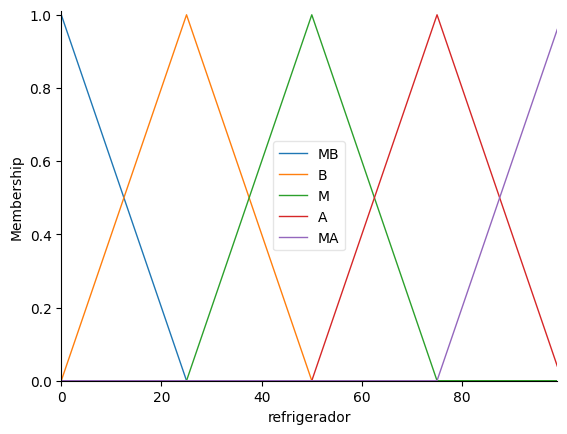

In [ ]:
# aquecedor - funções de pertinência e universo
refrigerador =ctrl.Consequent(np.arange(0, 100, 1), 'refrigerador')
refrigerador['MB'] = fuzz.trimf(refrigerador.universe, [0,0,25])
refrigerador['B'] = fuzz.trimf(refrigerador.universe, [0,25,50])
refrigerador['M'] = fuzz.trimf(refrigerador.universe, [25, 50, 75])
refrigerador['A'] = fuzz.trimf(refrigerador.universe, [50, 75, 100])
refrigerador['MA'] = fuzz.trimf(refrigerador.universe, [75, 100, 100])
refrigerador.view()

In [ ]:
regra1 = ctrl.Rule(errotemp['MN']& varerrotemp['MN'], refrigerador['MB'])
regra6 = ctrl.Rule(errotemp['MN']& varerrotemp['PN'], refrigerador['MB'])
regra11 = ctrl.Rule(errotemp['MN']& varerrotemp['ZE'], refrigerador['B'])
regra16 = ctrl.Rule(errotemp['MN']& varerrotemp['PP'], refrigerador['M'])
regra21 = ctrl.Rule(errotemp['MN']& varerrotemp['MP'], refrigerador['A'])
regra2 = ctrl.Rule(errotemp['PN']& varerrotemp['MN'], refrigerador['MB'])
regra7 = ctrl.Rule(errotemp['PN']& varerrotemp['PN'], refrigerador['MB'])
regra12 = ctrl.Rule(errotemp['PN']& varerrotemp['ZE'], refrigerador['B'])
regra17 = ctrl.Rule(errotemp['PN']& varerrotemp['PP'], refrigerador['M'])
regra22 = ctrl.Rule(errotemp['PN']& varerrotemp['MP'], refrigerador['A'])
regra3 = ctrl.Rule(errotemp['ZE']& varerrotemp['MN'], refrigerador['MB'])
regra8 = ctrl.Rule(errotemp['ZE']& varerrotemp['PN'], refrigerador['B'])
regra13 = ctrl.Rule(errotemp['ZE']& varerrotemp['ZE'], refrigerador['M'])
regra18 = ctrl.Rule(errotemp['ZE']& varerrotemp['PP'], refrigerador['A'])
regra23 = ctrl.Rule(errotemp['ZE']& varerrotemp['MP'], refrigerador['MA'])
regra4 = ctrl.Rule(errotemp['PP']& varerrotemp['MN'], refrigerador['B'])
regra9 = ctrl.Rule(errotemp['PP']& varerrotemp['PN'], refrigerador['M'])
regra14 = ctrl.Rule(errotemp['PP']& varerrotemp['ZE'], refrigerador['A'])
regra19 = ctrl.Rule(errotemp['PP']& varerrotemp['PP'], refrigerador['MA'])
regra24 = ctrl.Rule(errotemp['PP']& varerrotemp['MP'], refrigerador['MA'])
regra5 = ctrl.Rule(errotemp['MP']& varerrotemp['MN'], refrigerador['M'])
regra10 = ctrl.Rule(errotemp['MP']& varerrotemp['PN'], refrigerador['A'])
regra15 = ctrl.Rule(errotemp['MP']& varerrotemp['ZE'], refrigerador['MA'])
regra20 = ctrl.Rule(errotemp['MP']& varerrotemp['PP'], refrigerador['MA'])
regra25 = ctrl.Rule(errotemp['MP']& varerrotemp['MP'], refrigerador['MA'])


In [ ]:
refrigerador_ctrl = ctrl.ControlSystem([regra1, regra2, regra3,regra4,regra5,regra6, regra7, regra8,regra9,regra10,regra11, regra12, regra13,regra14,regra15,regra16, regra17, regra18,regra19,regra20,regra21, regra22, regra23,regra24,regra25])
potencia = ctrl.ControlSystemSimulation(refrigerador_ctrl)

In [33]:
# parâmetros iniciais do sistema
sp=-6
tempatual=-2
print(sp)
print(tempatual)
erroatual=0
while True:
  erroanterior=erroatual
  erroatual=tempatual-sp
  varerroTemp=erroatual-erroanterior
  potencia.input['errotemp'] =erroatual
  potencia.input['varerrotemp'] =varerroTemp
  potencia.compute()

  # simulação da temperatura
  i=0
  while (i < 10):
    tempatual=tempatual * 0.9952 - potencia.output['refrigerador'] * 0.0003963
    time.sleep(1)
    i += 1

  # publicação dos resultados via MQTT
  print(tempatual)
  # client.publish("Aquecedor/Temperatura", tempatual)
  # client.publish("Aquecedor/erro", erroatual)

-6
-2
-2.258989481865621
-2.4386795961369008
-2.6175423648422265
-2.788078525086094
-2.951379015401012
-3.1077771559003247
-3.2576282389715363
-3.4012582458598795
-3.5390035714973673
-3.671142825365563
-3.797958366321409
-3.9197078976571693
-4.036639571378599
-4.142491542306789
-4.22942465880027
-4.304311161195932
-4.369854261680432
-4.43428642763297
-4.494701733039259
-4.552556245567381
-4.607573947285991
-4.660137065336786
-4.710372251942713
-4.758471114318217
-4.804574789815132
-4.8488630810817845
-4.891323523581898
-4.932166072077807
-4.971562744847081
-5.009649504067939
-5.044571815824033
-5.0725543712094
-5.09688215629353
-5.117243271522945
-5.13743204184558
-5.154923824967454
-5.17182344491841
-5.186811444033232
-5.2010514656430225
-5.213884509290153
-5.225940856281919
-5.236915740345354
-5.247169014291097
-5.256554188790763
-5.265276296105145
-5.273289966776183
-5.280723027090595
-5.287571004315051
-5.2939097743105075
-5.299759030653242
-5.305172066064305
-5.310172497751026
-5.

KeyboardInterrupt: ignored